In [50]:
import polars as pl
import matplotlib.pyplot as plt


## Content List
- [1. Data reading](#data-reading)
- [2. Data cleaning and filtering](#data-cleaning)
- [3. Data transformation](#data-transformation)
- [4. Feature extraction](#4-freature-extraction)
- [5. Data analysis](#5-data-analysis)

# 1. Data reading <a id="data-reading"></a>

In [51]:
DATA_DIR = "./data"
dfs = []
for month in range(1, 13):
    df = pl.scan_parquet(f"{DATA_DIR}/{month}.parquet")
    df = df.with_columns(
        pl.col("tpep_pickup_datetime").dt.cast_time_unit("ms"),
        pl.col("tpep_dropoff_datetime").dt.cast_time_unit("ms"),
    )
    dfs.append(df)

df_2024 = pl.concat(dfs)
print(df_2024.explain())

UNION
  PLAN 0:
     WITH_COLUMNS:
     [col("tpep_pickup_datetime").dt.cast_time_unit(), col("tpep_dropoff_datetime").dt.cast_time_unit()] 
      Parquet SCAN [./data/1.parquet]
      PROJECT */19 COLUMNS
  PLAN 1:
     WITH_COLUMNS:
     [col("tpep_pickup_datetime").dt.cast_time_unit(), col("tpep_dropoff_datetime").dt.cast_time_unit()] 
      Parquet SCAN [./data/2.parquet]
      PROJECT */19 COLUMNS
  PLAN 2:
     WITH_COLUMNS:
     [col("tpep_pickup_datetime").dt.cast_time_unit(), col("tpep_dropoff_datetime").dt.cast_time_unit()] 
      Parquet SCAN [./data/3.parquet]
      PROJECT */19 COLUMNS
  PLAN 3:
     WITH_COLUMNS:
     [col("tpep_pickup_datetime").dt.cast_time_unit(), col("tpep_dropoff_datetime").dt.cast_time_unit()] 
      Parquet SCAN [./data/4.parquet]
      PROJECT */19 COLUMNS
  PLAN 4:
     WITH_COLUMNS:
     [col("tpep_pickup_datetime").dt.cast_time_unit(), col("tpep_dropoff_datetime").dt.cast_time_unit()] 
      Parquet SCAN [./data/5.parquet]
      PROJECT */19 CO

In [52]:
df_taxi_zones = pl.read_csv("data/taxi_zone_lookup.csv")
df_taxi_zones

LocationID,Borough,Zone,service_zone
i64,str,str,str
1,"""EWR""","""Newark Airport""","""EWR"""
2,"""Queens""","""Jamaica Bay""","""Boro Zone"""
3,"""Bronx""","""Allerton/Pelham Gardens""","""Boro Zone"""
4,"""Manhattan""","""Alphabet City""","""Yellow Zone"""
5,"""Staten Island""","""Arden Heights""","""Boro Zone"""
…,…,…,…
261,"""Manhattan""","""World Trade Center""","""Yellow Zone"""
262,"""Manhattan""","""Yorkville East""","""Yellow Zone"""
263,"""Manhattan""","""Yorkville West""","""Yellow Zone"""


In [53]:
df_2024.collect()

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
i32,datetime[ms],datetime[ms],i64,f64,i64,str,i32,i32,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1,"""N""",186,79,2,17.7,1.0,0.5,0.0,0.0,1.0,22.7,2.5,0.0
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.8,1,"""N""",140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
1,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.7,1,"""N""",236,79,1,23.3,3.5,0.5,3.0,0.0,1.0,31.3,2.5,0.0
1,2024-01-01 00:36:38,2024-01-01 00:44:56,1,1.4,1,"""N""",79,211,1,10.0,3.5,0.5,2.0,0.0,1.0,17.0,2.5,0.0
1,2024-01-01 00:46:51,2024-01-01 00:52:57,1,0.8,1,"""N""",211,148,1,7.9,3.5,0.5,3.2,0.0,1.0,16.1,2.5,0.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2,2024-12-31 23:32:00,2024-12-31 23:56:00,null,10.71,null,null,16,7,0,-4.13,0.0,0.5,0.0,0.0,1.0,-2.63,null,null
2,2024-12-31 23:05:00,2024-12-31 23:18:00,null,4.56,null,null,252,16,0,-1.68,0.0,0.5,0.0,0.0,1.0,-0.18,null,null
2,2024-12-31 23:03:16,2024-12-31 23:28:35,null,3.94,null,null,181,255,0,4.46,0.0,0.5,5.19,0.0,1.0,11.15,null,null


In [54]:
# filtering
filter_2024_2025 = (pl.col("tpep_pickup_datetime").dt.year() == 2024) & (
    pl.col("tpep_dropoff_datetime") <= pl.date(2025, 1, 1)
)
df = df_2024.filter(filter_2024_2025)

In [55]:
df.schema

/var/folders/_n/zfchkhnd1kd1krd5j2g884c40000gn/T/ipykernel_73053/3182147272.py:1: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  df.schema


Schema([('VendorID', Int32),
        ('tpep_pickup_datetime', Datetime(time_unit='ms', time_zone=None)),
        ('tpep_dropoff_datetime', Datetime(time_unit='ms', time_zone=None)),
        ('passenger_count', Int64),
        ('trip_distance', Float64),
        ('RatecodeID', Int64),
        ('store_and_fwd_flag', String),
        ('PULocationID', Int32),
        ('DOLocationID', Int32),
        ('payment_type', Int64),
        ('fare_amount', Float64),
        ('extra', Float64),
        ('mta_tax', Float64),
        ('tip_amount', Float64),
        ('tolls_amount', Float64),
        ('improvement_surcharge', Float64),
        ('total_amount', Float64),
        ('congestion_surcharge', Float64),
        ('Airport_fee', Float64)])

In [56]:
(
    df.select(
        # Datetime columns
        pl.col("tpep_pickup_datetime").min().alias("pickup_time_min"),
        pl.col("tpep_pickup_datetime").max().alias("pickup_time_max"),
        pl.col("tpep_dropoff_datetime").min().alias("dropoff_time_min"),
        pl.col("tpep_dropoff_datetime").max().alias("dropoff_time_max"),
        # Integer columns
        pl.col("VendorID").min().alias("VendorID_min"),
        pl.col("VendorID").max().alias("VendorID_max"),
        pl.col("passenger_count").min().alias("passenger_count_min"),
        pl.col("passenger_count").max().alias("passenger_count_max"),
        pl.col("RatecodeID").min().alias("RatecodeID_min"),
        pl.col("RatecodeID").max().alias("RatecodeID_max"),
        pl.col("PULocationID").min().alias("PULocationID_min"),
        pl.col("PULocationID").max().alias("PULocationID_max"),
        pl.col("DOLocationID").min().alias("DOLocationID_min"),
        pl.col("DOLocationID").max().alias("DOLocationID_max"),
        pl.col("payment_type").min().alias("payment_type_min"),
        pl.col("payment_type").max().alias("payment_type_max"),
        # Float columns
        pl.col("trip_distance").min().alias("trip_distance_min"),
        pl.col("trip_distance").max().alias("trip_distance_max"),
        pl.col("fare_amount").min().alias("fare_amount_min"),
        pl.col("fare_amount").max().alias("fare_amount_max"),
        pl.col("extra").min().alias("extra_min"),
        pl.col("extra").max().alias("extra_max"),
        pl.col("mta_tax").min().alias("mta_tax_min"),
        pl.col("mta_tax").max().alias("mta_tax_max"),
        pl.col("tip_amount").min().alias("tip_amount_min"),
        pl.col("tip_amount").max().alias("tip_amount_max"),
        pl.col("tolls_amount").min().alias("tolls_amount_min"),
        pl.col("tolls_amount").max().alias("tolls_amount_max"),
        pl.col("improvement_surcharge").min().alias("improvement_surcharge_min"),
        pl.col("improvement_surcharge").max().alias("improvement_surcharge_max"),
        pl.col("total_amount").min().alias("total_amount_min"),
        pl.col("total_amount").max().alias("total_amount_max"),
        pl.col("congestion_surcharge").min().alias("congestion_surcharge_min"),
        pl.col("congestion_surcharge").max().alias("congestion_surcharge_max"),
        pl.col("Airport_fee").min().alias("Airport_fee_min"),
        pl.col("Airport_fee").max().alias("Airport_fee_max"),
        pl.col("store_and_fwd_flag")
        .unique()
        .count()
        .alias("store_and_fwd_flag_unique_count"),
    ).collect()
)

pickup_time_min,pickup_time_max,dropoff_time_min,dropoff_time_max,VendorID_min,VendorID_max,passenger_count_min,passenger_count_max,RatecodeID_min,RatecodeID_max,PULocationID_min,PULocationID_max,DOLocationID_min,DOLocationID_max,payment_type_min,payment_type_max,trip_distance_min,trip_distance_max,fare_amount_min,fare_amount_max,extra_min,extra_max,mta_tax_min,mta_tax_max,tip_amount_min,tip_amount_max,tolls_amount_min,tolls_amount_max,improvement_surcharge_min,improvement_surcharge_max,total_amount_min,total_amount_max,congestion_surcharge_min,congestion_surcharge_max,Airport_fee_min,Airport_fee_max,store_and_fwd_flag_unique_count
datetime[ms],datetime[ms],datetime[ms],datetime[ms],i32,i32,i64,i64,i64,i64,i32,i32,i32,i32,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,u32
2024-01-01 00:00:00,2024-12-31 23:59:21,2024-01-01 00:02:42,2025-01-01 00:00:00,1,7,0,9,1,99,1,265,1,265,0,5,0.0,398608.62,-2261.2,335544.44,-9.25,65.99,-0.5,41.3,-300.0,999.99,-140.63,1702.88,-1.0,2.0,-2265.45,335550.94,-2.5,2.52,-1.75,1.75,2


In [57]:
# optimizing data types
df = df.with_columns(
    pl.col("VendorID").cast(pl.UInt8),
    pl.col("passenger_count").cast(pl.UInt8),
    pl.col("RatecodeID").cast(pl.UInt8),
    pl.col("PULocationID").cast(pl.UInt16),
    pl.col("DOLocationID").cast(pl.UInt16),
    pl.col("payment_type").cast(pl.UInt8),
    pl.col("trip_distance").cast(pl.Float32),
    pl.col("fare_amount").cast(pl.Float32),
    pl.col("extra").cast(pl.Float32),
    pl.col("mta_tax").cast(pl.Float32),
    pl.col("tip_amount").cast(pl.Float32),
    pl.col("tolls_amount").cast(pl.Float32),
    pl.col("improvement_surcharge").cast(pl.Int8),
    pl.col("total_amount").cast(pl.Float32),
    pl.col("congestion_surcharge").cast(pl.Float32),
    pl.col("Airport_fee").cast(pl.Float32),
).collect()

In [58]:
df.schema

Schema([('VendorID', UInt8),
        ('tpep_pickup_datetime', Datetime(time_unit='ms', time_zone=None)),
        ('tpep_dropoff_datetime', Datetime(time_unit='ms', time_zone=None)),
        ('passenger_count', UInt8),
        ('trip_distance', Float32),
        ('RatecodeID', UInt8),
        ('store_and_fwd_flag', String),
        ('PULocationID', UInt16),
        ('DOLocationID', UInt16),
        ('payment_type', UInt8),
        ('fare_amount', Float32),
        ('extra', Float32),
        ('mta_tax', Float32),
        ('tip_amount', Float32),
        ('tolls_amount', Float32),
        ('improvement_surcharge', Int8),
        ('total_amount', Float32),
        ('congestion_surcharge', Float32),
        ('Airport_fee', Float32)])

In [59]:
df_taxi_zones.schema

Schema([('LocationID', Int64),
        ('Borough', String),
        ('Zone', String),
        ('service_zone', String)])

In [60]:
df_taxi_zones.describe()

statistic,LocationID,Borough,Zone,service_zone
str,f64,str,str,str
"""count""",265.0,"""265""","""265""","""265"""
"""null_count""",0.0,"""0""","""0""","""0"""
"""mean""",133.0,null,null,null
"""std""",76.643112,null,null,null
"""min""",1.0,"""Bronx""","""Allerton/Pelham Gardens""","""Airports"""
"""25%""",67.0,null,null,null
"""50%""",133.0,null,null,null
"""75%""",199.0,null,null,null
"""max""",265.0,"""Unknown""","""Yorkville West""","""Yellow Zone"""


In [61]:
(
    df_taxi_zones.select(
        pl.col("LocationID").min().alias("LocationID_min"),
        pl.col("LocationID").max().alias("LocationID_max"),
        pl.col("Borough").unique().count().alias("Borough_unique_count"),
        pl.col("Zone").unique().count().alias("Zone_unique_count"),
        pl.col("service_zone").unique().count().alias("service_zone_unique_count"),
    )
)

LocationID_min,LocationID_max,Borough_unique_count,Zone_unique_count,service_zone_unique_count
i64,i64,u32,u32,u32
1,265,8,262,5


In [62]:
# optimizing data types
df_taxi_zones = df_taxi_zones.with_columns(
    pl.col("LocationID").cast(pl.UInt16),
)

# 2. Data cleaning and filtering <a id="data-cleaning"></a>

In [63]:
# fill NULL values in passengers_count with 1
df.describe()

statistic,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
str,f64,str,str,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",4.1169064e7,"""41169064""","""41169064""",3.7077867e7,4.1169064e7,3.7077867e7,"""37077867""",4.1169064e7,4.1169064e7,4.1169064e7,4.1169064e7,4.1169064e7,4.1169064e7,4.1169064e7,4.1169064e7,4.1169064e7,4.1169064e7,3.7077867e7,3.7077867e7
"""null_count""",0.0,"""0""","""0""",4.091197e6,0.0,4.091197e6,"""4091197""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.091197e6,4.091197e6
"""mean""",1.764231,"""2024-07-06 10:06:13.130000""","""2024-07-06 10:23:41.087000""",1.333927,4.97605,2.322168,null,164.243041,163.447651,1.107255,19.268278,1.385948,0.479778,3.307858,0.561511,0.962954,27.832537,2.232153,0.146999
"""std""",0.425858,null,null,0.815821,419.233826,10.928139,null,64.340795,69.599929,0.651506,76.720322,1.815873,0.130182,4.090466,2.240516,0.255181,78.054024,0.87464,0.502031
"""min""",1.0,"""2024-01-01 00:00:00""","""2024-01-01 00:02:42""",0.0,0.0,1.0,"""N""",1.0,1.0,0.0,-2261.199951,-9.25,-0.5,-300.0,-140.630005,-1.0,-2265.449951,-2.5,-1.75
"""25%""",2.0,"""2024-04-06 20:06:26""","""2024-04-06 20:22:54""",1.0,1.01,1.0,null,132.0,113.0,1.0,9.3,0.0,0.5,0.0,0.0,1.0,15.75,2.5,0.0
"""50%""",2.0,"""2024-07-03 23:28:31""","""2024-07-03 23:44:36""",1.0,1.76,1.0,null,161.0,162.0,1.0,13.5,1.0,0.5,2.6,0.0,1.0,21.0,2.5,0.0
"""75%""",2.0,"""2024-10-08 17:30:38""","""2024-10-08 17:50:40""",1.0,3.36,1.0,null,233.0,234.0,1.0,22.6,2.5,0.5,4.25,0.0,1.0,30.6,2.5,0.0
"""max""",7.0,"""2024-12-31 23:59:21""","""2025-01-01 00:00:00""",9.0,398608.625,99.0,"""Y""",265.0,265.0,5.0,335544.4375,65.989998,41.299999,999.98999,1702.880005,2.0,335550.9375,2.52,1.75


In [64]:
df = df.with_columns(pl.col("passenger_count").fill_null(0))
df.describe()

statistic,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
str,f64,str,str,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",4.1169064e7,"""41169064""","""41169064""",4.1169064e7,4.1169064e7,3.7077867e7,"""37077867""",4.1169064e7,4.1169064e7,4.1169064e7,4.1169064e7,4.1169064e7,4.1169064e7,4.1169064e7,4.1169064e7,4.1169064e7,4.1169064e7,3.7077867e7,3.7077867e7
"""null_count""",0.0,"""0""","""0""",0.0,0.0,4.091197e6,"""4091197""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.091197e6,4.091197e6
"""mean""",1.764231,"""2024-07-06 10:06:13.130000""","""2024-07-06 10:23:41.087000""",1.201367,4.97605,2.322168,null,164.243041,163.447651,1.107255,19.268278,1.385948,0.479778,3.307858,0.561511,0.962954,27.832537,2.232153,0.146999
"""std""",0.425858,null,null,0.87102,419.233826,10.928139,null,64.340795,69.599929,0.651506,76.720322,1.815873,0.130182,4.090466,2.240516,0.255181,78.054024,0.87464,0.502031
"""min""",1.0,"""2024-01-01 00:00:00""","""2024-01-01 00:02:42""",0.0,0.0,1.0,"""N""",1.0,1.0,0.0,-2261.199951,-9.25,-0.5,-300.0,-140.630005,-1.0,-2265.449951,-2.5,-1.75
"""25%""",2.0,"""2024-04-06 20:06:26""","""2024-04-06 20:22:54""",1.0,1.01,1.0,null,132.0,113.0,1.0,9.3,0.0,0.5,0.0,0.0,1.0,15.75,2.5,0.0
"""50%""",2.0,"""2024-07-03 23:28:31""","""2024-07-03 23:44:36""",1.0,1.76,1.0,null,161.0,162.0,1.0,13.5,1.0,0.5,2.6,0.0,1.0,21.0,2.5,0.0
"""75%""",2.0,"""2024-10-08 17:30:38""","""2024-10-08 17:50:40""",1.0,3.36,1.0,null,233.0,234.0,1.0,22.6,2.5,0.5,4.25,0.0,1.0,30.6,2.5,0.0
"""max""",7.0,"""2024-12-31 23:59:21""","""2025-01-01 00:00:00""",9.0,398608.625,99.0,"""Y""",265.0,265.0,5.0,335544.4375,65.989998,41.299999,999.98999,1702.880005,2.0,335550.9375,2.52,1.75


In [65]:
# remove rides with zero passengers
df = df.filter(pl.col("passenger_count") > 0)

In [66]:
# if a ride has over 6 passengers, replace the value with 6
df = df.with_columns(
    pl.when(pl.col("passenger_count") > 6).then(6).otherwise(pl.col("passenger_count"))
)

In [67]:
# remove rides lasting over 2 hours
df = df.filter(
    (
        pl.col("tpep_dropoff_datetime") - pl.col("tpep_pickup_datetime")
    ).dt.total_minutes()
    <= 120
)

In [68]:
# in all money-related columns, replace values with absolute value to fix negative amounts
money_columns = [
    "fare_amount",
    "extra",
    "mta_tax",
    "tip_amount",
    "tolls_amount",
    "improvement_surcharge",
    "total_amount",
    "congestion_surcharge",
    "Airport_fee",
]

df = df.with_columns(*[pl.col(col).abs().alias(col) for col in money_columns])

In [69]:
# remove rides with over 1000 dollars in any money-related column
for col in money_columns:
    df = df.filter(pl.col(col) <= 1000)

In [70]:
# remove rows with values of RatecodeID or VendorID missing or outside those defined in the data dictionary
valid_vendor_ids = [1, 2, 6, 7]
valid_ratecode_ids = [1, 2, 3, 4, 5, 6, 99]
df = df.filter(
    (pl.col("VendorID").is_in(valid_vendor_ids)) & (pl.col("VendorID").is_not_null())
).filter(
    (pl.col("RatecodeID").is_in(valid_ratecode_ids))
    & (pl.col("RatecodeID").is_not_null())
)

# 3. Data transformation <a id="data-transformation"></a>

In [71]:
# combine payment type values for "No charge", "Dispute",
# "Unknown" and "Voided trip" into one type, so we have only credit card, cash, or other
# new mapping: 4 -> other

df = df.with_columns(
    pl.when(pl.col("payment_type").is_in([3, 4, 5, 6]))
    .then(4)
    .otherwise(pl.col("payment_type"))
    .alias("payment_type")
)

In [72]:
df_taxi_zones

LocationID,Borough,Zone,service_zone
u16,str,str,str
1,"""EWR""","""Newark Airport""","""EWR"""
2,"""Queens""","""Jamaica Bay""","""Boro Zone"""
3,"""Bronx""","""Allerton/Pelham Gardens""","""Boro Zone"""
4,"""Manhattan""","""Alphabet City""","""Yellow Zone"""
5,"""Staten Island""","""Arden Heights""","""Boro Zone"""
…,…,…,…
261,"""Manhattan""","""World Trade Center""","""Yellow Zone"""
262,"""Manhattan""","""Yorkville East""","""Yellow Zone"""
263,"""Manhattan""","""Yorkville West""","""Yellow Zone"""


In [73]:
df.join(df_taxi_zones, left_on="PULocationID", right_on="LocationID", how="left")

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,literal,Borough,Zone,service_zone
u8,datetime[ms],datetime[ms],u8,f32,u8,str,u16,u16,u8,f32,f32,f32,f32,f32,i8,f32,f32,f32,u8,str,str,str
2,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1,"""N""",186,79,2,17.700001,1.0,0.5,0.0,0.0,1,22.700001,2.5,0.0,1,"""Manhattan""","""Penn Station/Madison Sq West""","""Yellow Zone"""
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.8,1,"""N""",140,236,1,10.0,3.5,0.5,3.75,0.0,1,18.75,2.5,0.0,1,"""Manhattan""","""Lenox Hill East""","""Yellow Zone"""
1,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.7,1,"""N""",236,79,1,23.299999,3.5,0.5,3.0,0.0,1,31.299999,2.5,0.0,1,"""Manhattan""","""Upper East Side North""","""Yellow Zone"""
1,2024-01-01 00:36:38,2024-01-01 00:44:56,1,1.4,1,"""N""",79,211,1,10.0,3.5,0.5,2.0,0.0,1,17.0,2.5,0.0,1,"""Manhattan""","""East Village""","""Yellow Zone"""
1,2024-01-01 00:46:51,2024-01-01 00:52:57,1,0.8,1,"""N""",211,148,1,7.9,3.5,0.5,3.2,0.0,1,16.1,2.5,0.0,1,"""Manhattan""","""SoHo""","""Yellow Zone"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2,2024-12-31 22:56:33,2024-12-31 23:05:57,1,1.9,1,"""N""",237,262,1,12.1,1.0,0.5,1.88,0.0,1,18.98,2.5,0.0,1,"""Manhattan""","""Upper East Side South""","""Yellow Zone"""
2,2024-12-31 23:18:37,2024-12-31 23:32:32,1,3.88,1,"""N""",237,226,2,19.1,1.0,0.5,0.0,0.0,1,24.1,2.5,0.0,1,"""Manhattan""","""Upper East Side South""","""Yellow Zone"""
2,2024-12-31 23:08:52,2024-12-31 23:34:59,1,5.53,1,"""N""",142,255,1,29.6,1.0,0.5,2.0,0.0,1,36.599998,2.5,0.0,1,"""Manhattan""","""Lincoln Square East""","""Yellow Zone"""


In [74]:
# First join for pickup location
df = df.join(
    df_taxi_zones.select(["LocationID", "Borough"]),
    left_on="PULocationID",
    right_on="LocationID",
    how="left",
)
df = df.rename({"Borough": "pickup_borough"})
df = df.drop("PULocationID")

# Second join for dropoff location
df = df.join(
    df_taxi_zones.select(["LocationID", "Borough"]),
    left_on="DOLocationID",
    right_on="LocationID",
    how="left",
)
df = df.rename({"Borough": "dropoff_borough"})
df = df.drop("DOLocationID")

In [75]:
df

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,literal,pickup_borough,dropoff_borough
u8,datetime[ms],datetime[ms],u8,f32,u8,str,u8,f32,f32,f32,f32,f32,i8,f32,f32,f32,u8,str,str
2,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1,"""N""",2,17.700001,1.0,0.5,0.0,0.0,1,22.700001,2.5,0.0,1,"""Manhattan""","""Manhattan"""
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.8,1,"""N""",1,10.0,3.5,0.5,3.75,0.0,1,18.75,2.5,0.0,1,"""Manhattan""","""Manhattan"""
1,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.7,1,"""N""",1,23.299999,3.5,0.5,3.0,0.0,1,31.299999,2.5,0.0,1,"""Manhattan""","""Manhattan"""
1,2024-01-01 00:36:38,2024-01-01 00:44:56,1,1.4,1,"""N""",1,10.0,3.5,0.5,2.0,0.0,1,17.0,2.5,0.0,1,"""Manhattan""","""Manhattan"""
1,2024-01-01 00:46:51,2024-01-01 00:52:57,1,0.8,1,"""N""",1,7.9,3.5,0.5,3.2,0.0,1,16.1,2.5,0.0,1,"""Manhattan""","""Manhattan"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2,2024-12-31 22:56:33,2024-12-31 23:05:57,1,1.9,1,"""N""",1,12.1,1.0,0.5,1.88,0.0,1,18.98,2.5,0.0,1,"""Manhattan""","""Manhattan"""
2,2024-12-31 23:18:37,2024-12-31 23:32:32,1,3.88,1,"""N""",2,19.1,1.0,0.5,0.0,0.0,1,24.1,2.5,0.0,1,"""Manhattan""","""Queens"""
2,2024-12-31 23:08:52,2024-12-31 23:34:59,1,5.53,1,"""N""",1,29.6,1.0,0.5,2.0,0.0,1,36.599998,2.5,0.0,1,"""Manhattan""","""Brooklyn"""


In [76]:
# add boolean variable is_airport_ride, true if there is non-zero airport fee
df = df.with_columns((pl.col("Airport_fee") > 0).alias("is_airport_ride"))

In [77]:
# add boolean variable is_rush_hour, rush hours are defined as 6:30–9:30 and 15:30-20:00 during weekdays
df = df.with_columns(
    pl.when(
        (
            (
                (pl.col("tpep_pickup_datetime").dt.hour() >= 6)
                & (pl.col("tpep_pickup_datetime").dt.hour() < 9)
                & (pl.col("tpep_pickup_datetime").dt.minute() >= 30)
            )
            | (
                (pl.col("tpep_pickup_datetime").dt.hour() >= 15)
                & (pl.col("tpep_pickup_datetime").dt.hour() < 20)
            )
        )
        & (pl.col("tpep_pickup_datetime").dt.weekday() < 5)
    )
    .then(True)
    .otherwise(False)
    .alias("is_rush_hour")
)

In [78]:
df

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,literal,pickup_borough,dropoff_borough,is_airport_ride,is_rush_hour
u8,datetime[ms],datetime[ms],u8,f32,u8,str,u8,f32,f32,f32,f32,f32,i8,f32,f32,f32,u8,str,str,bool,bool
2,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1,"""N""",2,17.700001,1.0,0.5,0.0,0.0,1,22.700001,2.5,0.0,1,"""Manhattan""","""Manhattan""",false,false
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.8,1,"""N""",1,10.0,3.5,0.5,3.75,0.0,1,18.75,2.5,0.0,1,"""Manhattan""","""Manhattan""",false,false
1,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.7,1,"""N""",1,23.299999,3.5,0.5,3.0,0.0,1,31.299999,2.5,0.0,1,"""Manhattan""","""Manhattan""",false,false
1,2024-01-01 00:36:38,2024-01-01 00:44:56,1,1.4,1,"""N""",1,10.0,3.5,0.5,2.0,0.0,1,17.0,2.5,0.0,1,"""Manhattan""","""Manhattan""",false,false
1,2024-01-01 00:46:51,2024-01-01 00:52:57,1,0.8,1,"""N""",1,7.9,3.5,0.5,3.2,0.0,1,16.1,2.5,0.0,1,"""Manhattan""","""Manhattan""",false,false
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2,2024-12-31 22:56:33,2024-12-31 23:05:57,1,1.9,1,"""N""",1,12.1,1.0,0.5,1.88,0.0,1,18.98,2.5,0.0,1,"""Manhattan""","""Manhattan""",false,false
2,2024-12-31 23:18:37,2024-12-31 23:32:32,1,3.88,1,"""N""",2,19.1,1.0,0.5,0.0,0.0,1,24.1,2.5,0.0,1,"""Manhattan""","""Queens""",false,false
2,2024-12-31 23:08:52,2024-12-31 23:34:59,1,5.53,1,"""N""",1,29.6,1.0,0.5,2.0,0.0,1,36.599998,2.5,0.0,1,"""Manhattan""","""Brooklyn""",false,false


# 4. Freature extraction <a id="feature-extraction"></a>

In [79]:
df = df.with_columns(pl.col("tpep_pickup_datetime").dt.date().alias("date"))

In [80]:
df

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,literal,pickup_borough,dropoff_borough,is_airport_ride,is_rush_hour,date
u8,datetime[ms],datetime[ms],u8,f32,u8,str,u8,f32,f32,f32,f32,f32,i8,f32,f32,f32,u8,str,str,bool,bool,date
2,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1,"""N""",2,17.700001,1.0,0.5,0.0,0.0,1,22.700001,2.5,0.0,1,"""Manhattan""","""Manhattan""",false,false,2024-01-01
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.8,1,"""N""",1,10.0,3.5,0.5,3.75,0.0,1,18.75,2.5,0.0,1,"""Manhattan""","""Manhattan""",false,false,2024-01-01
1,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.7,1,"""N""",1,23.299999,3.5,0.5,3.0,0.0,1,31.299999,2.5,0.0,1,"""Manhattan""","""Manhattan""",false,false,2024-01-01
1,2024-01-01 00:36:38,2024-01-01 00:44:56,1,1.4,1,"""N""",1,10.0,3.5,0.5,2.0,0.0,1,17.0,2.5,0.0,1,"""Manhattan""","""Manhattan""",false,false,2024-01-01
1,2024-01-01 00:46:51,2024-01-01 00:52:57,1,0.8,1,"""N""",1,7.9,3.5,0.5,3.2,0.0,1,16.1,2.5,0.0,1,"""Manhattan""","""Manhattan""",false,false,2024-01-01
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2,2024-12-31 22:56:33,2024-12-31 23:05:57,1,1.9,1,"""N""",1,12.1,1.0,0.5,1.88,0.0,1,18.98,2.5,0.0,1,"""Manhattan""","""Manhattan""",false,false,2024-12-31
2,2024-12-31 23:18:37,2024-12-31 23:32:32,1,3.88,1,"""N""",2,19.1,1.0,0.5,0.0,0.0,1,24.1,2.5,0.0,1,"""Manhattan""","""Queens""",false,false,2024-12-31
2,2024-12-31 23:08:52,2024-12-31 23:34:59,1,5.53,1,"""N""",1,29.6,1.0,0.5,2.0,0.0,1,36.599998,2.5,0.0,1,"""Manhattan""","""Brooklyn""",false,false,2024-12-31


In [81]:
# add features aggregating daily rides information:
# move it before dummy encoding, as I need payment_type value for aggregation and
# it is easier to do it before make payment_type column dummy encoding


df_to_join = df.group_by("date").agg(
    [
        pl.mean("fare_amount").alias("mean_daily_fare_amount"),
        pl.median("trip_distance").alias("median_daily_trip_distance"),
        pl.sum("total_amount").alias("total_daily_sum"),
        pl.when(pl.col("payment_type") == 1)
        .then(pl.col("total_amount"))
        .otherwise(0)
        .sum()
        .alias("card_payment_daily_sum"),
        pl.when(pl.col("payment_type") == 2)
        .then(pl.col("total_amount"))
        .otherwise(0)
        .sum()
        .alias("cash_payment_daily_sum"),
        pl.when(~pl.col("payment_type").is_in([1, 2]))
        .then(pl.col("total_amount"))
        .otherwise(0)
        .sum()
        .alias("other_payment_daily_sum"),
        pl.sum("congestion_surcharge").alias("total_daily_congestion_surcharge"),
        pl.sum("passenger_count").alias("total_daily_passenger_count"),
    ]
)

df = df.join(df_to_join, on="date", how="left")

In [82]:
# #apply dummy encoding to features:
# # payment type
# # pickup borough
# dropoff borough
# Dummy encoding (one-hot) for selected columns
df = df.to_dummies(
    columns=["payment_type", "pickup_borough", "dropoff_borough"], drop_first=True
)

In [83]:
df

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type_1,payment_type_4,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,literal,pickup_borough_Bronx,pickup_borough_Brooklyn,pickup_borough_EWR,pickup_borough_N/A,pickup_borough_Queens,pickup_borough_Staten Island,pickup_borough_Unknown,dropoff_borough_Bronx,dropoff_borough_Brooklyn,dropoff_borough_EWR,dropoff_borough_N/A,dropoff_borough_Queens,dropoff_borough_Staten Island,dropoff_borough_Unknown,is_airport_ride,is_rush_hour,date,mean_daily_fare_amount,median_daily_trip_distance,total_daily_sum,card_payment_daily_sum,cash_payment_daily_sum,other_payment_daily_sum,total_daily_congestion_surcharge,total_daily_passenger_count
u8,datetime[ms],datetime[ms],u8,f32,u8,str,u8,u8,f32,f32,f32,f32,f32,i8,f32,f32,f32,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,bool,bool,date,f32,f32,f32,f32,f32,f32,f32,i64
2,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1,"""N""",0,0,17.700001,1.0,0.5,0.0,0.0,1,22.700001,2.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,false,false,2024-01-01,22.217703,2.09,2.185003e6,1.7445e6,384659.9375,55778.90625,156123.25,109145
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.8,1,"""N""",1,0,10.0,3.5,0.5,3.75,0.0,1,18.75,2.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,false,false,2024-01-01,22.217703,2.09,2.185003e6,1.7445e6,384659.9375,55778.90625,156123.25,109145
1,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.7,1,"""N""",1,0,23.299999,3.5,0.5,3.0,0.0,1,31.299999,2.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,false,false,2024-01-01,22.217703,2.09,2.185003e6,1.7445e6,384659.9375,55778.90625,156123.25,109145
1,2024-01-01 00:36:38,2024-01-01 00:44:56,1,1.4,1,"""N""",1,0,10.0,3.5,0.5,2.0,0.0,1,17.0,2.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,false,false,2024-01-01,22.217703,2.09,2.185003e6,1.7445e6,384659.9375,55778.90625,156123.25,109145
1,2024-01-01 00:46:51,2024-01-01 00:52:57,1,0.8,1,"""N""",1,0,7.9,3.5,0.5,3.2,0.0,1,16.1,2.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,false,false,2024-01-01,22.217703,2.09,2.185003e6,1.7445e6,384659.9375,55778.90625,156123.25,109145
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2,2024-12-31 22:56:33,2024-12-31 23:05:57,1,1.9,1,"""N""",1,0,12.1,1.0,0.5,1.88,0.0,1,18.98,2.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,false,false,2024-12-31,18.428528,1.61,2.0853e6,1.6291e6,353587.65625,102561.742188,175165.0,113288
2,2024-12-31 23:18:37,2024-12-31 23:32:32,1,3.88,1,"""N""",0,0,19.1,1.0,0.5,0.0,0.0,1,24.1,2.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,false,false,2024-12-31,18.428528,1.61,2.0853e6,1.6291e6,353587.65625,102561.742188,175165.0,113288
2,2024-12-31 23:08:52,2024-12-31 23:34:59,1,5.53,1,"""N""",1,0,29.6,1.0,0.5,2.0,0.0,1,36.599998,2.5,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,false,false,2024-12-31,18.428528,1.61,2.0853e6,1.6291e6,353587.65625,102561.742188,175165.0,113288


In [84]:
# add integer variables for counting daily events

df_to_join = df.group_by("date").agg(
    [
        pl.count().alias("total_amount_of_rides"),
        pl.col("is_airport_ride").sum().alias("total_amount_of_airport_rides"),
        pl.col("is_rush_hour").sum().alias("total_amount_of_rush_hour_rides"),
    ]
)

df = df.join(df_to_join, on="date", how="left")

/var/folders/_n/zfchkhnd1kd1krd5j2g884c40000gn/T/ipykernel_73053/2585411685.py:4: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  .agg([pl.count().alias("total_amount_of_rides"),


In [85]:
# add time features:
# quarter
# month
# day_of_month
# day_of_week
# is_weekend (boolean)


df = df.with_columns(
    pl.col("tpep_pickup_datetime").dt.quarter().alias("quarter"),
    pl.col("tpep_pickup_datetime").dt.month().alias("month"),
    pl.col("tpep_pickup_datetime").dt.day().alias("day_of_month"),
    pl.col("tpep_pickup_datetime").dt.weekday().alias("day_of_week"),
    (pl.col("tpep_pickup_datetime").dt.weekday() >= 5).alias("is_weekend"),
)

In [86]:
df

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type_1,payment_type_4,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,literal,pickup_borough_Bronx,pickup_borough_Brooklyn,pickup_borough_EWR,pickup_borough_N/A,pickup_borough_Queens,pickup_borough_Staten Island,pickup_borough_Unknown,dropoff_borough_Bronx,dropoff_borough_Brooklyn,dropoff_borough_EWR,dropoff_borough_N/A,dropoff_borough_Queens,dropoff_borough_Staten Island,dropoff_borough_Unknown,is_airport_ride,is_rush_hour,date,mean_daily_fare_amount,median_daily_trip_distance,total_daily_sum,card_payment_daily_sum,cash_payment_daily_sum,other_payment_daily_sum,total_daily_congestion_surcharge,total_daily_passenger_count,total_amount_of_rides,total_amount_of_airport_rides,total_amount_of_rush_hour_rides,quarter,month,day_of_month,day_of_week,is_weekend
u8,datetime[ms],datetime[ms],u8,f32,u8,str,u8,u8,f32,f32,f32,f32,f32,i8,f32,f32,f32,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,bool,bool,date,f32,f32,f32,f32,f32,f32,f32,i64,u32,u32,u32,i8,i8,i8,i8,bool
2,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1,"""N""",0,0,17.700001,1.0,0.5,0.0,0.0,1,22.700001,2.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,false,false,2024-01-01,22.217703,2.09,2.185003e6,1.7445e6,384659.9375,55778.90625,156123.25,109145,69665,8352,19716,1,1,1,1,false
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.8,1,"""N""",1,0,10.0,3.5,0.5,3.75,0.0,1,18.75,2.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,false,false,2024-01-01,22.217703,2.09,2.185003e6,1.7445e6,384659.9375,55778.90625,156123.25,109145,69665,8352,19716,1,1,1,1,false
1,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.7,1,"""N""",1,0,23.299999,3.5,0.5,3.0,0.0,1,31.299999,2.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,false,false,2024-01-01,22.217703,2.09,2.185003e6,1.7445e6,384659.9375,55778.90625,156123.25,109145,69665,8352,19716,1,1,1,1,false
1,2024-01-01 00:36:38,2024-01-01 00:44:56,1,1.4,1,"""N""",1,0,10.0,3.5,0.5,2.0,0.0,1,17.0,2.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,false,false,2024-01-01,22.217703,2.09,2.185003e6,1.7445e6,384659.9375,55778.90625,156123.25,109145,69665,8352,19716,1,1,1,1,false
1,2024-01-01 00:46:51,2024-01-01 00:52:57,1,0.8,1,"""N""",1,0,7.9,3.5,0.5,3.2,0.0,1,16.1,2.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,false,false,2024-01-01,22.217703,2.09,2.185003e6,1.7445e6,384659.9375,55778.90625,156123.25,109145,69665,8352,19716,1,1,1,1,false
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2,2024-12-31 22:56:33,2024-12-31 23:05:57,1,1.9,1,"""N""",1,0,12.1,1.0,0.5,1.88,0.0,1,18.98,2.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,false,false,2024-12-31,18.428528,1.61,2.0853e6,1.6291e6,353587.65625,102561.742188,175165.0,113288,77175,5291,27343,4,12,31,2,false
2,2024-12-31 23:18:37,2024-12-31 23:32:32,1,3.88,1,"""N""",0,0,19.1,1.0,0.5,0.0,0.0,1,24.1,2.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,false,false,2024-12-31,18.428528,1.61,2.0853e6,1.6291e6,353587.65625,102561.742188,175165.0,113288,77175,5291,27343,4,12,31,2,false
2,2024-12-31 23:08:52,2024-12-31 23:34:59,1,5.53,1,"""N""",1,0,29.6,1.0,0.5,2.0,0.0,1,36.599998,2.5,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,false,false,2024-12-31,18.428528,1.61,2.0853e6,1.6291e6,353587.65625,102561.742188,175165.0,113288,77175,5291,27343,4,12,31,2,false


In [87]:
# drop unneeded columns
df = df.drop(["VendorID", "tpep_pickup_datetime", "tpep_dropoff_datetime"])

In [88]:
df.shape

(36636097, 49)

In [89]:
df

passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type_1,payment_type_4,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,literal,pickup_borough_Bronx,pickup_borough_Brooklyn,pickup_borough_EWR,pickup_borough_N/A,pickup_borough_Queens,pickup_borough_Staten Island,pickup_borough_Unknown,dropoff_borough_Bronx,dropoff_borough_Brooklyn,dropoff_borough_EWR,dropoff_borough_N/A,dropoff_borough_Queens,dropoff_borough_Staten Island,dropoff_borough_Unknown,is_airport_ride,is_rush_hour,date,mean_daily_fare_amount,median_daily_trip_distance,total_daily_sum,card_payment_daily_sum,cash_payment_daily_sum,other_payment_daily_sum,total_daily_congestion_surcharge,total_daily_passenger_count,total_amount_of_rides,total_amount_of_airport_rides,total_amount_of_rush_hour_rides,quarter,month,day_of_month,day_of_week,is_weekend
u8,f32,u8,str,u8,u8,f32,f32,f32,f32,f32,i8,f32,f32,f32,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,bool,bool,date,f32,f32,f32,f32,f32,f32,f32,i64,u32,u32,u32,i8,i8,i8,i8,bool
1,1.72,1,"""N""",0,0,17.700001,1.0,0.5,0.0,0.0,1,22.700001,2.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,false,false,2024-01-01,22.217703,2.09,2.185003e6,1.7445e6,384659.9375,55778.90625,156123.25,109145,69665,8352,19716,1,1,1,1,false
1,1.8,1,"""N""",1,0,10.0,3.5,0.5,3.75,0.0,1,18.75,2.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,false,false,2024-01-01,22.217703,2.09,2.185003e6,1.7445e6,384659.9375,55778.90625,156123.25,109145,69665,8352,19716,1,1,1,1,false
1,4.7,1,"""N""",1,0,23.299999,3.5,0.5,3.0,0.0,1,31.299999,2.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,false,false,2024-01-01,22.217703,2.09,2.185003e6,1.7445e6,384659.9375,55778.90625,156123.25,109145,69665,8352,19716,1,1,1,1,false
1,1.4,1,"""N""",1,0,10.0,3.5,0.5,2.0,0.0,1,17.0,2.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,false,false,2024-01-01,22.217703,2.09,2.185003e6,1.7445e6,384659.9375,55778.90625,156123.25,109145,69665,8352,19716,1,1,1,1,false
1,0.8,1,"""N""",1,0,7.9,3.5,0.5,3.2,0.0,1,16.1,2.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,false,false,2024-01-01,22.217703,2.09,2.185003e6,1.7445e6,384659.9375,55778.90625,156123.25,109145,69665,8352,19716,1,1,1,1,false
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1,1.9,1,"""N""",1,0,12.1,1.0,0.5,1.88,0.0,1,18.98,2.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,false,false,2024-12-31,18.428528,1.61,2.0853e6,1.6291e6,353587.65625,102561.742188,175165.0,113288,77175,5291,27343,4,12,31,2,false
1,3.88,1,"""N""",0,0,19.1,1.0,0.5,0.0,0.0,1,24.1,2.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,false,false,2024-12-31,18.428528,1.61,2.0853e6,1.6291e6,353587.65625,102561.742188,175165.0,113288,77175,5291,27343,4,12,31,2,false
1,5.53,1,"""N""",1,0,29.6,1.0,0.5,2.0,0.0,1,36.599998,2.5,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,false,false,2024-12-31,18.428528,1.61,2.0853e6,1.6291e6,353587.65625,102561.742188,175165.0,113288,77175,5291,27343,4,12,31,2,false


In [97]:
df = df.unique(subset=["date"])
df.shape

(366, 49)

In [98]:
df.write_parquet("data/dataset.parquet")

# 5. Data analysis <a id="data-analysis"></a>

In [99]:
# shape
df.shape

(366, 49)

In [100]:
# top rows
df.head()

passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type_1,payment_type_4,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,literal,pickup_borough_Bronx,pickup_borough_Brooklyn,pickup_borough_EWR,pickup_borough_N/A,pickup_borough_Queens,pickup_borough_Staten Island,pickup_borough_Unknown,dropoff_borough_Bronx,dropoff_borough_Brooklyn,dropoff_borough_EWR,dropoff_borough_N/A,dropoff_borough_Queens,dropoff_borough_Staten Island,dropoff_borough_Unknown,is_airport_ride,is_rush_hour,date,mean_daily_fare_amount,median_daily_trip_distance,total_daily_sum,card_payment_daily_sum,cash_payment_daily_sum,other_payment_daily_sum,total_daily_congestion_surcharge,total_daily_passenger_count,total_amount_of_rides,total_amount_of_airport_rides,total_amount_of_rush_hour_rides,quarter,month,day_of_month,day_of_week,is_weekend
u8,f32,u8,str,u8,u8,f32,f32,f32,f32,f32,i8,f32,f32,f32,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,bool,bool,date,f32,f32,f32,f32,f32,f32,f32,i64,u32,u32,u32,i8,i8,i8,i8,bool
1,3.31,1,"""N""",1,0,18.4,0.0,0.5,5.6,0.0,1,28.0,2.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,false,false,2024-08-13,19.668505,1.72,2486149.5,2.0651e6,347920.5,73074.296875,195765.0,113634,86373,8125,33530,3,8,13,2,false
3,0.8,1,"""N""",0,0,13.5,5.0,0.5,0.0,0.0,1,20.0,2.5,0.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,false,true,2024-12-10,20.81846,1.6,3.8605e6,3367785.5,403011.5,89639.007812,294258.25,159734,126222,10328,48046,4,12,10,2,false
1,3.54,1,"""N""",0,0,24.0,0.0,0.5,0.0,0.0,1,28.0,2.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,false,false,2024-03-20,19.149832,1.69,3.0301e6,2.6018e6,364914.3125,63296.335938,245295.0,135691,106121,8360,41827,1,3,20,3,false
1,4.46,1,"""N""",1,0,31.0,0.0,0.5,5.25,0.0,1,40.25,2.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,false,false,2024-04-04,19.731695,1.7,3.3377e6,2.8347e6,431983.875,71002.875,263692.5,151778,114363,10381,43296,2,4,4,4,false
1,0.8,1,"""N""",1,0,8.6,3.5,0.5,3.4,0.0,1,17.0,2.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,false,false,2024-12-07,19.461647,1.61,3.6303e6,3077163.5,429207.46875,123894.6875,306871.0,189260,130649,7806,0,4,12,7,6,true


In [101]:
# stats
df.describe()

statistic,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type_1,payment_type_4,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,literal,pickup_borough_Bronx,pickup_borough_Brooklyn,pickup_borough_EWR,pickup_borough_N/A,pickup_borough_Queens,pickup_borough_Staten Island,pickup_borough_Unknown,dropoff_borough_Bronx,dropoff_borough_Brooklyn,dropoff_borough_EWR,dropoff_borough_N/A,dropoff_borough_Queens,dropoff_borough_Staten Island,dropoff_borough_Unknown,is_airport_ride,is_rush_hour,date,mean_daily_fare_amount,median_daily_trip_distance,total_daily_sum,card_payment_daily_sum,cash_payment_daily_sum,other_payment_daily_sum,total_daily_congestion_surcharge,total_daily_passenger_count,total_amount_of_rides,total_amount_of_airport_rides,total_amount_of_rush_hour_rides,quarter,month,day_of_month,day_of_week,is_weekend
str,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",366.0,366.0,366.0,"""366""",366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,"""366""",366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0,366.0
"""null_count""",0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1.516393,3.888224,2.166667,null,0.814208,0.019126,21.772131,1.54235,0.494536,3.715519,0.724645,0.991803,31.159016,2.26776,0.143443,1.516393,0.002732,0.019126,0.0,0.0,0.095628,0.0,0.0,0.008197,0.043716,0.002732,0.005464,0.068306,0.0,0.010929,0.081967,0.202186,"""2024-07-01 12:00:00""",19.953608,1.718648,2.9114e6,2.4610e6,372266.0625,78165.875,230205.828125,134964.191257,100098.625683,8978.631148,22682.562842,2.505464,6.513661,15.756831,3.986339,0.42623
"""std""",1.006012,4.934895,10.203791,null,0.389471,0.137154,18.099333,1.912625,0.052056,4.027246,2.335971,0.090287,22.791344,0.726711,0.480708,1.006012,0.052271,0.137154,0.0,0.0,0.294484,0.0,0.0,0.090287,0.204742,0.052271,0.073821,0.252616,0.0,0.104111,null,null,null,1.204955,0.100899,461672.59375,428988.71875,36204.21875,17271.240234,37866.164062,18726.374743,15373.530846,1716.749204,20115.821654,1.119551,3.455958,8.823592,2.006108,null
"""min""",1.0,0.0,1.0,"""N""",0.0,0.0,3.7,0.0,0.0,0.0,0.0,0.0,7.92,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""2024-01-01""",16.676249,1.5,1.3260e6,996571.4375,240632.921875,41303.871094,107825.0,74199.0,47391.0,3355.0,0.0,1.0,1.0,1.0,1.0,0.0
"""25%""",1.0,1.1,1.0,null,1.0,0.0,10.0,0.0,0.5,0.0,0.0,1.0,16.799999,2.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,"""2024-04-01""",19.125853,1.66,2581948.5,2170285.5,352428.375,65781.96875,203501.0,122222.0,89573.0,7869.0,0.0,2.0,4.0,8.0,2.0,null
"""50%""",1.0,2.02,1.0,null,1.0,0.0,16.299999,1.0,0.5,3.0,0.0,1.0,23.5,2.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,"""2024-07-02""",19.952921,1.7,2.916712e6,2463090.5,375976.8125,79217.171875,232825.0,134084.0,100782.0,9020.0,33530.0,3.0,7.0,16.0,4.0,null
"""75%""",2.0,4.0,1.0,null,1.0,0.0,25.4,2.5,0.5,4.95,0.0,1.0,35.299999,2.5,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,"""2024-10-01""",20.713577,1.77,3.2230e6,2.7452e6,398647.90625,90279.65625,256942.0,147192.0,110805.0,10144.0,41062.0,4.0,10.0,23.0,6.0,null
"""max""",6.0,31.41,99.0,"""Y""",1.0,1.0,160.5,10.25,0.5,22.98,22.32,1.0,171.440002,2.5,1.75,6.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,"""2024-12-31""",24.447693,2.2,4.464577e6,3.918411e6,449946.96875,123894.6875,330475.0,199445.0,141702.0,14904.0,53180.0,4.0,12.0,31.0,7.0,1.0


In [102]:
# schema
df.schema

Schema([('passenger_count', UInt8),
        ('trip_distance', Float32),
        ('RatecodeID', UInt8),
        ('store_and_fwd_flag', String),
        ('payment_type_1', UInt8),
        ('payment_type_4', UInt8),
        ('fare_amount', Float32),
        ('extra', Float32),
        ('mta_tax', Float32),
        ('tip_amount', Float32),
        ('tolls_amount', Float32),
        ('improvement_surcharge', Int8),
        ('total_amount', Float32),
        ('congestion_surcharge', Float32),
        ('Airport_fee', Float32),
        ('literal', UInt8),
        ('pickup_borough_Bronx', UInt8),
        ('pickup_borough_Brooklyn', UInt8),
        ('pickup_borough_EWR', UInt8),
        ('pickup_borough_N/A', UInt8),
        ('pickup_borough_Queens', UInt8),
        ('pickup_borough_Staten Island', UInt8),
        ('pickup_borough_Unknown', UInt8),
        ('dropoff_borough_Bronx', UInt8),
        ('dropoff_borough_Brooklyn', UInt8),
        ('dropoff_borough_EWR', UInt8),
        ('dropoff_boro

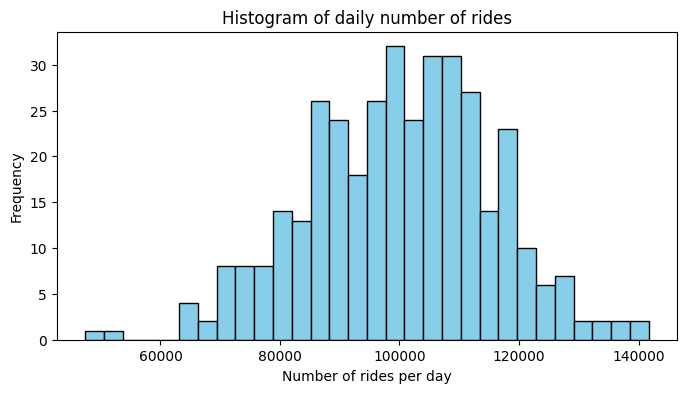

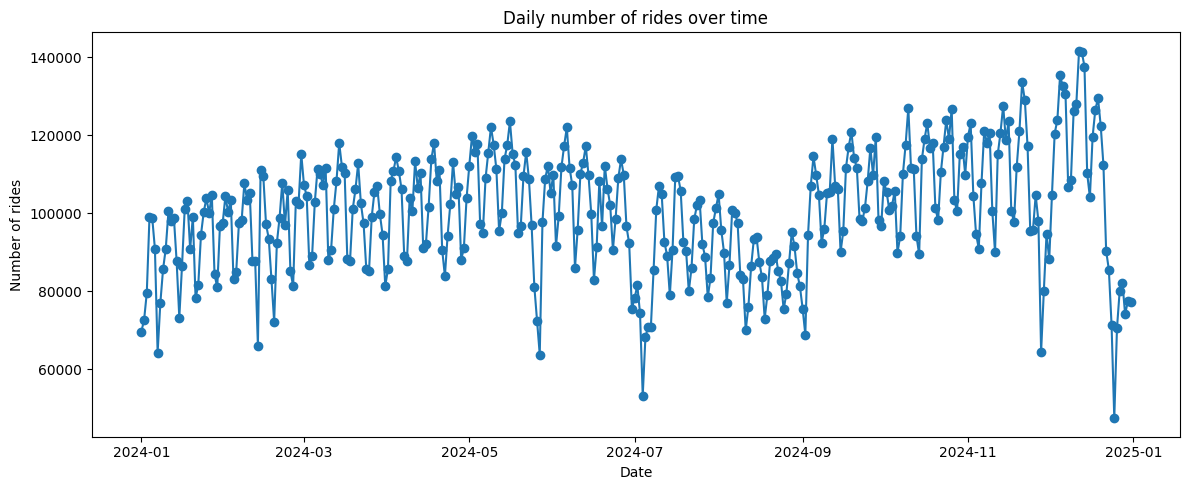

In [104]:
# plot target variable (daily number of rides)

# Histogram of daily number of rides
plt.figure(figsize=(8, 4))
plt.hist(
    df["total_amount_of_rides"].to_numpy(), bins=30, color="skyblue", edgecolor="black"
)
plt.xlabel("Number of rides per day")
plt.ylabel("Frequency")
plt.title("Histogram of daily number of rides")
plt.show()

# Line plot: date vs number of rides
df_sorted = df.sort("date")
plt.figure(figsize=(12, 5))
plt.plot(
    df_sorted["date"].to_numpy(),
    df_sorted["total_amount_of_rides"].to_numpy(),
    marker="o",
    linestyle="-",
)
plt.xlabel("Date")
plt.ylabel("Number of rides")
plt.title("Daily number of rides over time")
plt.tight_layout()
plt.show()